# Align images

### Following this tutorial:

https://scikit-image.org/docs/dev/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py


In [100]:
#load packages
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

import tifffile as tiff

In [101]:
#load the two images into numpy arrays
path_img1='/groups/zimmer/Ulises/code/imutils/imutils/test_images/Result of 2021-03-04_16-17-30_worm3_ZIM2051-channel-0-bigtiff_volume_537.tif'
img1=tiff.imread(path_img1)
path_img2='/groups/zimmer/Ulises/code/imutils/imutils/test_images/MAX_2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff-1.tif'
img2=tiff.imread(path_img2)

In [102]:
#print shapes
print('image 1 shape is: ', img1.shape)
print('image 2 shape is: ', img2.shape)

image 1 shape is:  (800, 800)
image 2 shape is:  (700, 900)


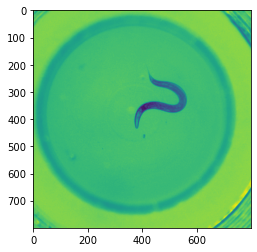

In [103]:
#plot image 1 to crop only ROI
plt.imshow(img1)

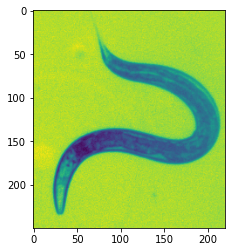

In [182]:
#crop
img1_c=img1[200:450,350:570]
plt.imshow(img1_c)

In [105]:
#Upscale image 1 (BH) which has lower pixel resolution

In [183]:
#calculate scale ratios
##pixel size in um
img1_px_size=0.325
img2_px_size=2.4
scale=img2_px_size/img1_px_size
print('scale is :', scale)


#specify rotation
rotation=0#np.pi/12

#specify translation
translation=0

tform = transform.SimilarityTransform(
    scale=scale,
    rotation=rotation,
    translation=translation)

scale is : 7.384615384615384


In [184]:
#calculate output_shape based on the scale and the crop dimensions
output_shape=tuple([(scale)*x for x in img1_c.shape])


In [185]:
#convert it into integers with math.ceil function
output_shape=tuple([math.ceil(x) for x in output_shape])
print(output_shape)

(1847, 1625)


In [186]:
#plot transformation parameters and apply transformation
print(tform.params)
tf_img1 = transform.warp(img1_c, tform.inverse, output_shape=output_shape)

[[ 7.38461538 -0.          0.        ]
 [ 0.          7.38461538  0.        ]
 [ 0.          0.          1.        ]]


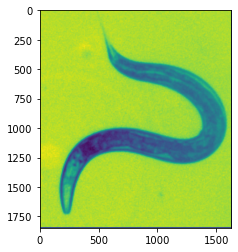

In [189]:
### plot img1 upscaled
plt.imshow(tf_img1)

Text(0.5, 1.0, 'Similarity transformation')

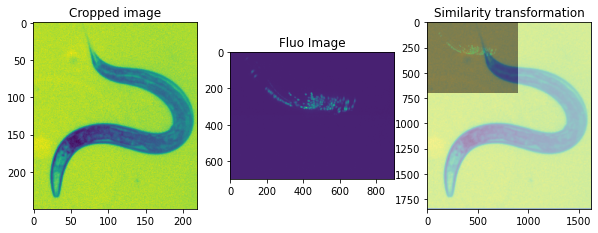

In [192]:
fig, ax = plt.subplots(figsize=(10,10),ncols=3)
ax[0].imshow(img1_c)
ax[0].set_title('Cropped image')
ax[1].imshow(img2)
ax[1].set_title('Fluo Image')

ax[2].imshow(img2)
ax[2].imshow(tf_img1, alpha=0.5)
ax[2].set_title('Similarity transformation')

In [193]:
#now transform img2 (rotate and translate)

#scale2
scale2=1 #we don't scale it because we previously scaled the bh image. We dont want to downscale this now.

#rotation2
rotation2=np.pi/1.7#1.65
print(rotation2)
print(np.rad2deg(rotation2))

#translation2
translation2=(680,1000)

#transformation2
tform2 = transform.SimilarityTransform(
    scale=scale2,
    rotation=rotation2,
    translation=translation2)

1.8479956785822313
105.88235294117648


In [196]:
print(tform2.params)

tf_img2 = transform.warp(img2, tform2.inverse, output_shape=tf_img1.shape)

[[-2.73662990e-01 -9.61825643e-01  6.80000000e+02]
 [ 9.61825643e-01 -2.73662990e-01  1.00000000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


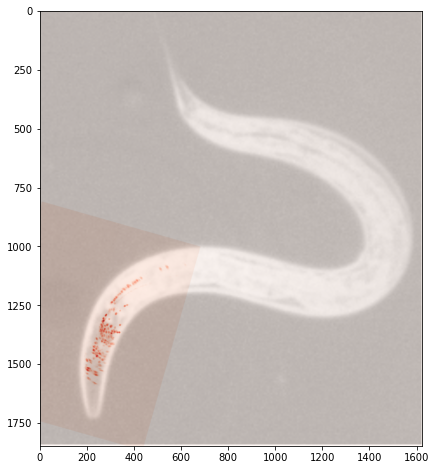

In [197]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(tf_img2, cmap='Reds')
ax.imshow(tf_img1, cmap='Greys', alpha=0.3)

## Trying now only transforming the Fluorescent image
The Fluorescent image will be downscaled so it will loose resolution

In [1]:
#load packages
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

import tifffile as tiff

In [4]:
#load the two images into numpy arrays
path_img1='/groups/zimmer/Ulises/code/imutils/imutils/test_images/Result of 2021-03-04_16-17-30_worm3_ZIM2051-channel-0-bigtiff_volume_537.tif'
img1=tiff.imread(path_img1)
path_img2='/groups/zimmer/Ulises/code/imutils/imutils/test_images/MAX_2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff-1.tif'
img2=tiff.imread(path_img2)

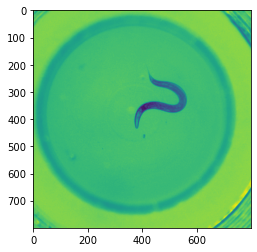

In [3]:
plt.imshow(img1)

In [5]:
#now transform img2 (rotate and translate)

#scale2
scale2=1/7.384615384615384

#rotation2
rotation2=np.pi/1.85
print(rotation2)
print(np.rad2deg(rotation2))

#translation2
translation2=(430,330)#(680,1000)

#transformation2
tform2 = transform.SimilarityTransform(
    scale=scale2,
    rotation=rotation2,
    translation=translation2)

1.6981581911296177
97.29729729729729


In [6]:
print(tform2.params)
tf_img2 = transform.warp(img2, tform2.inverse, output_shape=img1.shape)

[[-1.72003298e-02 -1.34319851e-01  4.30000000e+02]
 [ 1.34319851e-01 -1.72003298e-02  3.30000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


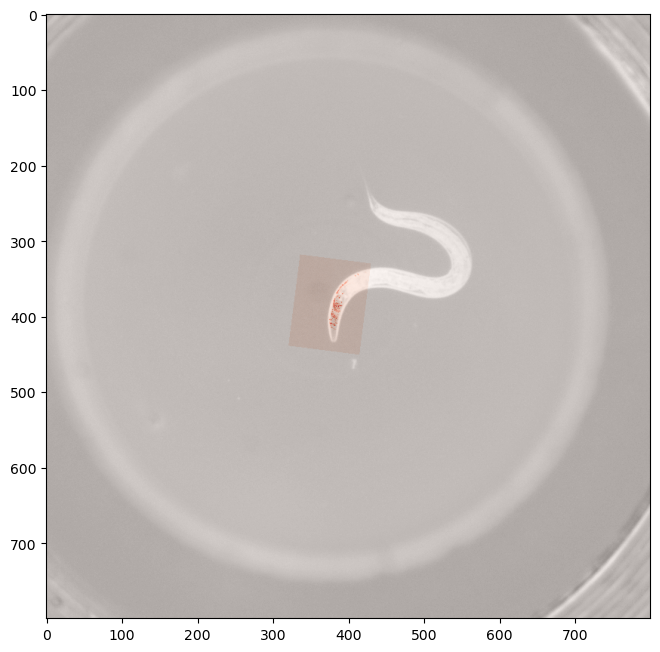

In [10]:
#plotting only the merge
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
ax.imshow(tf_img2, cmap='Reds')
ax.imshow(img1, cmap='Greys', alpha=0.4)

Text(0.5, 1.0, 'Merged')

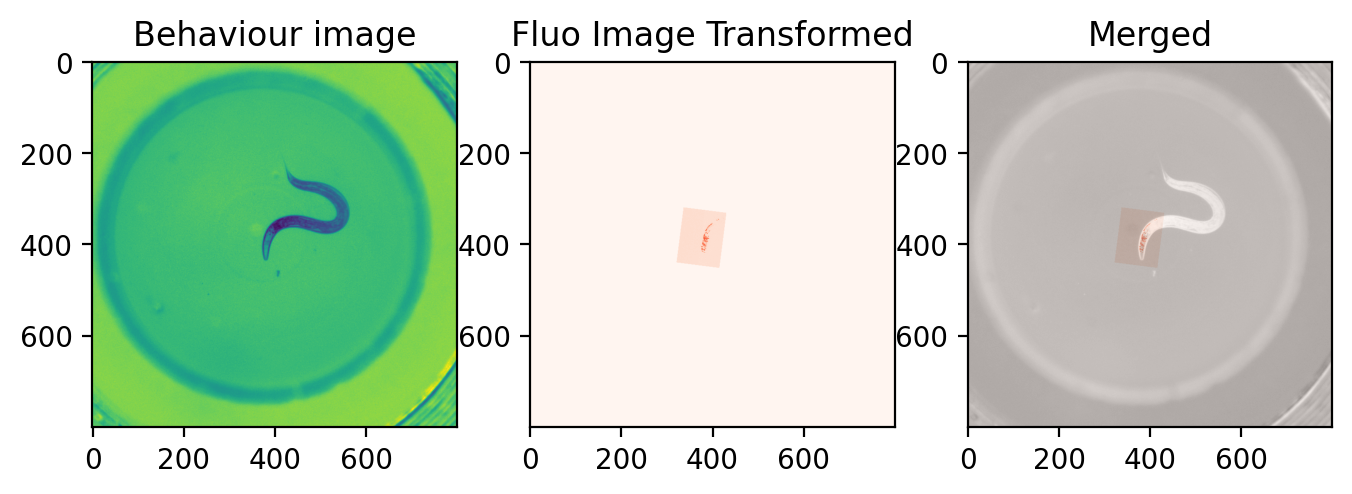

In [13]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200, ncols=3)

ax[0].imshow(img1)
ax[1].imshow(tf_img2, cmap='Reds')
ax[2].imshow(tf_img2, cmap='Reds')
ax[2].imshow(img1, cmap='Greys', alpha=0.4)

ax[0].set_title('Behaviour image')
ax[1].set_title('Fluo Image Transformed')
ax[2].set_title('Merged')